# Experimenting with Inflation

In [58]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import os
import pycel
from pycel import ExcelCompiler
import pandas as pd


filename = r'simple_simulator.xlsx'
plt.style.use('seaborn-poster')

In [59]:
excel = ExcelCompiler(filename=filename,cycles=True)

Initialized with cycles: True, while workbook says: False


In [60]:
shock_size = excel.evaluate('simulator!J6')
no_policy = excel.evaluate('simulator!A1:H30')
before_policy = excel.evaluate('simulator!A1:H6')
after_policy = excel.evaluate('simulator!A1:H7')
# to display use display(); for dataframe have to save and open with pandas

In [61]:
print(after_policy)

(('time', 'Yn', 'Y', 'Pi', 'Pi_e', 'rs', 'r', 'A'), (1, 100, 100, 2, 2, 1.0, 1, 101), (2, 100, 100, 2, 2, 1.0, 1, 101), (3, 100, 100, 2, 2, 1.0, 1, 101), (4, 100, 100, 2, 2, 4.0, 1, 101), (5, 97.0, 100, 5, 2, 4.0, 1, 101), (6, 97.0, 100, 8, 5, 4.0, 1, 101))


In [62]:
def PlotStuff(exceloutput, after = False):
    '''Plots inflation and unemployment on side-by-side subplots'''
    figs, axs = plt.subplots(1, 2, figsize=[16, 8])
    if after:
        axs[0].plot([exceloutput[i][0] for i in range(1, len(exceloutput)-1)], [exceloutput[i][3] for i in range(1, len(exceloutput)-1)])
        axs[1].plot([exceloutput[i][0] for i in range(1, len(exceloutput)-1)], [exceloutput[i][2] for i in range(1, len(exceloutput)-1)])
        axs[0].plot([exceloutput[-2][0], exceloutput[-1][0]], [exceloutput[-2][3], exceloutput[-1][3]], 'r')
        axs[1].plot([exceloutput[-2][0], exceloutput[-1][0]], [exceloutput[-2][2], exceloutput[-1][2]], 'r')
    else:
        axs[0].plot([exceloutput[i][0] for i in range(1, len(exceloutput))], [exceloutput[i][3] for i in range(1, len(exceloutput))])
        axs[1].plot([exceloutput[i][0] for i in range(1, len(exceloutput))], [exceloutput[i][2] for i in range(1, len(exceloutput))])
        axs[0].plot(exceloutput[-1][0] + 1, exceloutput[-1][3])
        axs[1].plot(exceloutput[-1][0] + 1, exceloutput[-1][2])
    axs[0].set_title('Inflation')
    axs[1].set_title('GDP')
    axs[0].set_xlabel('Period')
    axs[1].set_xlabel('Period')


    plt.show()


[video]

Sint quis consequat id laborum aliqua duis dolor cupidatat minim reprehenderit deserunt qui. Et esse do incididunt eu ea deserunt. Tempor adipisicing quis culpa sunt dolore id consectetur cupidatat laborum nulla anim occaecat culpa. Et irure deserunt eu dolore labore laborum. Dolor et officia duis incididunt eiusmod cupidatat fugiat nulla.

Duis exercitation commodo anim occaecat culpa anim minim qui sit occaecat eu excepteur magna. Deserunt anim nisi qui cupidatat laborum aliqua cupidatat pariatur. Ex labore duis mollit qui. Tempor minim proident ea elit aliquip. Irure id commodo fugiat reprehenderit aliquip fugiat ex officia sint ad veniam adipisicing. Velit quis ex laboris pariatur pariatur deserunt ea dolore labore aute quis. Adipisicing nostrud non reprehenderit aliqua ex ad reprehenderit amet voluptate cupidatat ad ullamco esse.

Sunt esse quis sint consectetur. Eu est mollit voluptate ullamco qui. Cupidatat sint incididunt exercitation eu eiusmod aute occaecat voluptate in dolor duis exercitation anim. Lorem laborum mollit nulla minim nulla officia fugiat ex enim enim. Qui irure nostrud occaecat deserunt.

## No Policy

### Here is a non-interactive graph showing the effect of a permanent inflation shock when there is no change in monetary policy.  Needs aesthetics update. 

Elit dolor sunt exercitation incididunt cillum officia sint ullamco non nostrud mollit ea exercitation. Commodo reprehenderit quis culpa est minim duis sunt quis dolor dolore excepteur nostrud adipisicing nostrud. Exercitation cupidatat anim cupidatat amet. Id ea non elit veniam ut aute et fugiat. Dolore eu quis nisi nostrud enim occaecat ad deserunt irure velit fugiat aute nisi culpa.

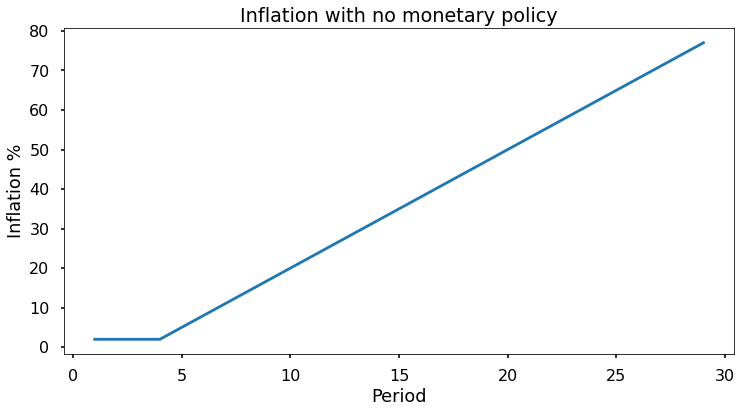

In [63]:
fig, ax = plt.subplots(1, 1, figsize = [12, 6])
ax.plot([no_policy[i][0] for i in range(1, len(no_policy))], [no_policy[i][3] for i in range(1, len(no_policy))])
ax.set_title('Inflation with no monetary policy')
ax.set_ylabel('Inflation %')
ax.set_xlabel('Period')

plt.show()

Aliqua veniam incididunt exercitation Lorem exercitation commodo esse veniam duis amet veniam. Minim aute aute ad eu nulla pariatur officia enim sunt cillum mollit dolore anim. Quis amet veniam labore Lorem amet officia occaecat. Labore qui nulla ex adipisicing. Laboris commodo ex adipisicing consequat enim.

Culpa deserunt excepteur irure anim excepteur dolore. Quis sint duis consectetur consectetur mollit quis amet ex elit adipisicing nisi. Do aliquip incididunt laboris ut. Excepteur eiusmod anim id ipsum.

Deserunt nostrud enim do pariatur in pariatur. Laborum anim sit laborum veniam cupidatat voluptate nostrud non voluptate commodo veniam esse esse. Non amet sint ex nisi aute.

## Interactive Policy

<h3>There's been a permanent inflation shock in period 5. Choose a real interest rate to see its effect - you should aim to stabilise inflation.</h3>

In [64]:
out = widgets.Output(layout={'border': '2px solid gray', 'padding': '5px 5px 5px 5px', 'margin': '0 0 0 0'})
display(out)

Output(layout=Layout(border='2px solid gray', margin='0 0 0 0', padding='5px 5px 5px 5px'))

In [69]:
r = widgets.IntSlider(1, 0, 10)
sub = widgets.Button(description='Submit')

with out:
    out.clear_output(wait=True)
    display(r, sub)
    # display(before_policy)
    PlotStuff(before_policy)


def on_sub(b):
    excel.evaluate('simulator!G6')
    chosenrate = r.value
    excel.set_value('simulator!G6', chosenrate)
    excel.recalculate()
    after_policy = excel.evaluate('simulator!A1:H7')
    with out:
        out.clear_output(wait=True)
        display(r, sub)
        print(f'chosen rate {chosenrate} - see below for its effects')
        # display(excel.evaluate('simulator!G6'))
        # display(after_policy)
        PlotStuff(after_policy, after=True)
        if chosenrate == 4:
            print('')
            display(widgets.HTML('<h3>you stabilised inflation - congratulations. however, look at unemployment. ..........</h3>'))
            display(widgets.HTML('<p>Sit eu sunt aliqua occaecat consectetur laboris ipsum quis veniam nostrud consectetur adipisicing. Culpa officia anim consequat exercitation consectetur laboris reprehenderit consequat culpa elit aliquip. Irure laboris sint ea sint voluptate minim nulla quis minim officia consectetur nulla velit. Id elit dolor quis irure amet do minim velit ad amet ea laboris./p>'))
            print()
            print()
        elif chosenrate <= 1:
            print('')
            display(widgets.HTML('<h3>Unemployment is looking healthy - but inflation is still getting higher. This is because ......</h3>'))
            display(widgets.HTML('<p>Esse ad deserunt deserunt sit non consequat ullamco nulla amet. Irure magna nostrud consequat ex pariatur ad aliqua tempor amet dolore et occaecat dolor. Officia non voluptate ex irure amet qui nulla quis fugiat voluptate tempor sint. Laborum anim officia proident duis esse enim officia do aliquip irure do. Reprehenderit et exercitation labore dolore magna ex dolor tempor proident tempor deserunt. Et eiusmod nisi ea esse qui aute et.</p>'))
            print()
            print()
        elif 1 < chosenrate < 4:
            print('')
            display(widgets.HTML('<h3>Inflation is still getting higher, and meanwhile unemployment is getting worse too! this is because ..... </h3>'))
            display(widgets.HTML('<p>Adipisicing ut nisi dolore mollit. Est fugiat do veniam sunt duis non aliqua irure aliqua fugiat commodo ut. Consectetur exercitation pariatur ullamco occaecat duis eiusmod est officia eiusmod. Sit ullamco magna est reprehenderit reprehenderit dolor do non aliquip magna. Incididunt ea tempor nulla est laborum. Exercitation Lorem ullamco in pariatur excepteur enim nulla.</p>'))
            print()
            print()
        elif 4 < chosenrate:
            print('')
            display(widgets.HTML('<h3>Inflation is heading back down to equilibrium - but employment is tanking. ...........?</h3>'))
            display(widgets.HTML('<p>Enim incididunt do veniam velit officia reprehenderit quis commodo. Excepteur voluptate nisi id reprehenderit ullamco proident qui enim voluptate mollit ea quis ipsum eu. Amet ullamco mollit in incididunt ullamco ipsum id id aliqua enim.</p>'))
            print()
            print()


sub.on_click(on_sub)


Consequat aliquip voluptate consequat ea occaecat dolore. Laborum eiusmod ex quis eu qui Lorem consectetur exercitation voluptate laboris quis occaecat irure. Eu sint adipisicing laborum incididunt. Ex labore irure tempor aute tempor aliquip nisi duis ipsum excepteur. Fugiat id mollit id commodo officia qui ea aliqua Lorem aute excepteur.

Cillum officia occaecat nisi veniam eu. Exercitation do eiusmod et commodo ad est dolore aute. Proident irure deserunt dolor culpa occaecat officia sunt consectetur aliqua fugiat deserunt aliqua.

Velit non Lorem cupidatat nostrud occaecat consectetur irure quis quis magna commodo ea. Officia sint irure quis exercitation in sint ad culpa laborum ullamco in do irure enim. Ea aute quis elit magna aliqua esse mollit. Amet veniam ex proident ea nulla cupidatat sit incididunt sit irure. Pariatur dolore ad ea non nostrud consectetur est nostrud qui est commodo fugiat.

In aute occaecat ad cupidatat velit elit consequat deserunt amet proident. Veniam laborum enim sunt consectetur aliqua voluptate. Reprehenderit sunt commodo ut laboris voluptate dolor.

In [66]:
# PlotStuff(after_policy)
# plt.show()

# How an inflation targeting CB gets inflation back to target

Need something interactive that compares responses of:
* Unchanging Output CB (doesn't want ot affect GDP, leads to increasing inflation but unchanged output)
* Timid CB (doesn't want to immediately do anything to r, eventually puts it up after some periods, once output gap finally gets negative inflation falls)
* Optimal CB (controls inflation with a recession)

Idea is to compare and show recession is best in any case - it's an uncomfortable truth, but can't risk stagflation etc. 

Maybe just show the graphs and ask which is which? Or maybe label each with their effects (or ask to match the effects to the graphs), and then student chooses which is most optimal. Should be relatively obvious. Frame it as "Here unemployment is fine, but inflation is getting really high", "Here unemployment stayed fine for a while, but began to rise with inflation as the CB began to implement measures", "Here there was a costly recession really soon after the inflation came, but the economy has recovered to being back on track"

* unchanged - all policy = 1
* timid - all policy = 1 until p10, then [11, 9, 7, 6, 5] then 4 for the rest
* optimal = will sort later

In [70]:
excel = ExcelCompiler(filename=filename,cycles=True)
excel.evaluate('simulator!G6')
excel.set_value('simulator!G6', 1)
excel.recalculate()
no_change_policy = excel.evaluate('simulator!A1:H30')
excel.set_value('simulator!G11:G30', [11, 9, 7, 6, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])
excel.recalculate()
timid_policy = excel.evaluate('simulator!A1:H30')
excel.set_value('simulator!G6:G30', [5.5, 4.8, 4.4, 4.2, 4.1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])
excel.recalculate()
optimal_policy = excel.evaluate('simulator!A1:H30')


Initialized with cycles: True, while workbook says: False


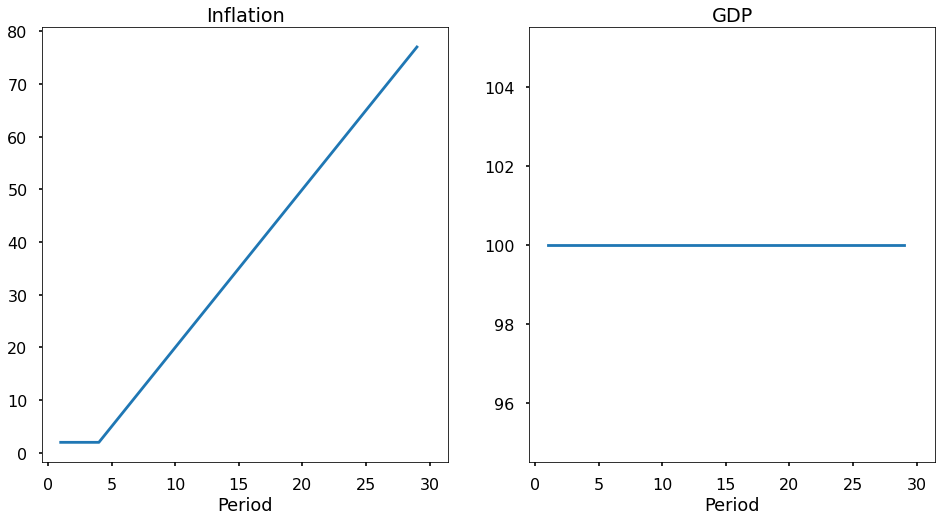

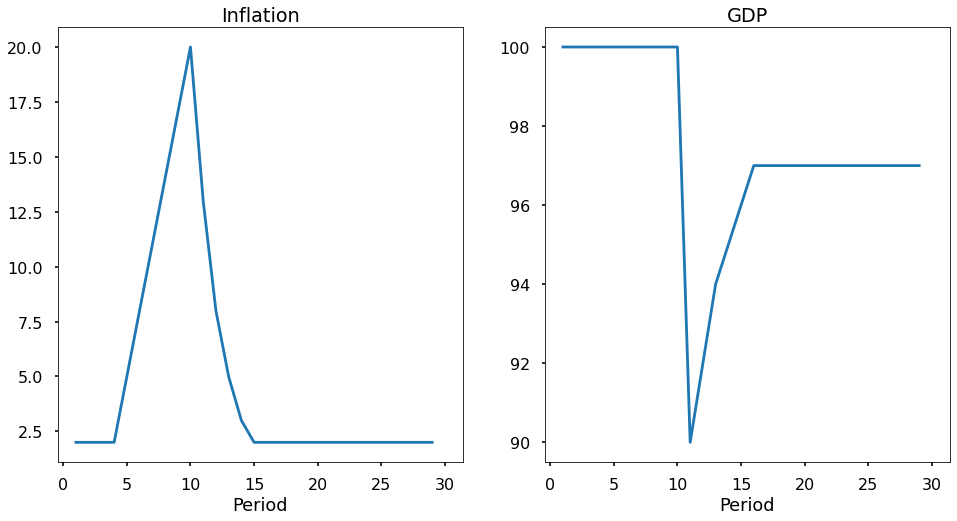

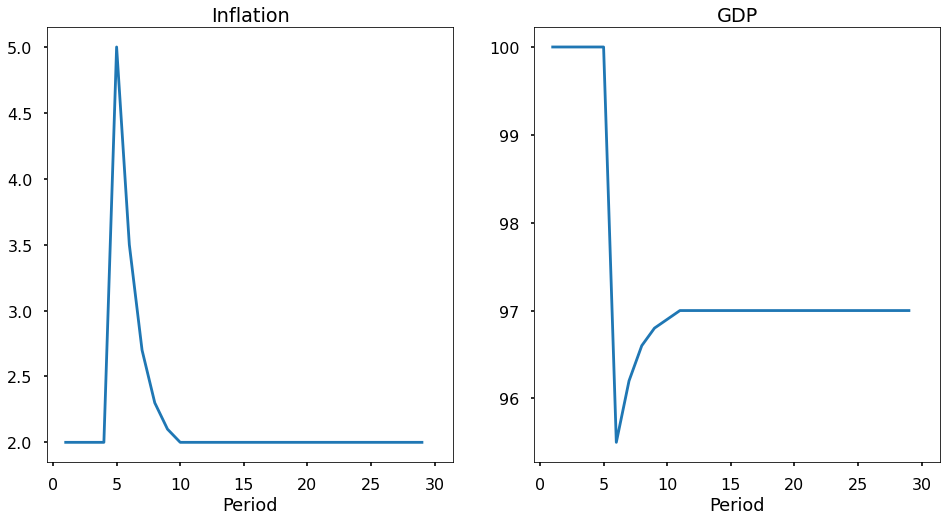

In [71]:
PlotStuff(no_change_policy, after=False)
PlotStuff(timid_policy, after=False)
PlotStuff(optimal_policy, after=False)

# Experimenting with Inflation Adversity

Despite optimal response being a recession, the extent of recession depends on CB beta. Have something interactive that shows difference between different CB betas - idea is to show that if they really want to avoid a big recession, recovery is just going to take longer.

# Inflation Expectations

Inflation recovery is not just dependent on CB. Households and firms' expectations about inflation affect their behaviour. Explain how this relates to CB credibility. Then have interactive widget to show how CB credibility affects optimal response.